# **An analysis and forecasting  of the air pollution levels in India**

In this project we will take a look at 24 Indian cities air pollution levels over the years as well as forecast the air pollution levels for the next 1 year at the current rate of pollution for the entire country. We will also try to explain the trends, seasonality etc. from the data given.
We will be using AQI - Air quality Index, as our measure for the air pollution levels.
The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/ .

There will be two main parts to the project:
1. To compare the various states on the level of pollution for the year 2019.
2. To find trends, seasonality etc for the pollution levels of India as a whole as well as Delhi and forecast it to the future.

<img src="https://i.imgur.com/XmnE0rT.png" alt="">

In [1]:
# Importing necessary libraries to conduct our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [29]:
#Reading the dataset into object 'df' using pandas:
df= pd.read_csv('..\Datasets\AQI_CitywiseData.csv',parse_dates=True, index_col = "Date")
# df['Date'] = pd.to_datetime(df['Date'])

In [34]:
final_df=df.resample(rule='MS').mean()

Let us take a quick look at the graph of India's AQI over the years.

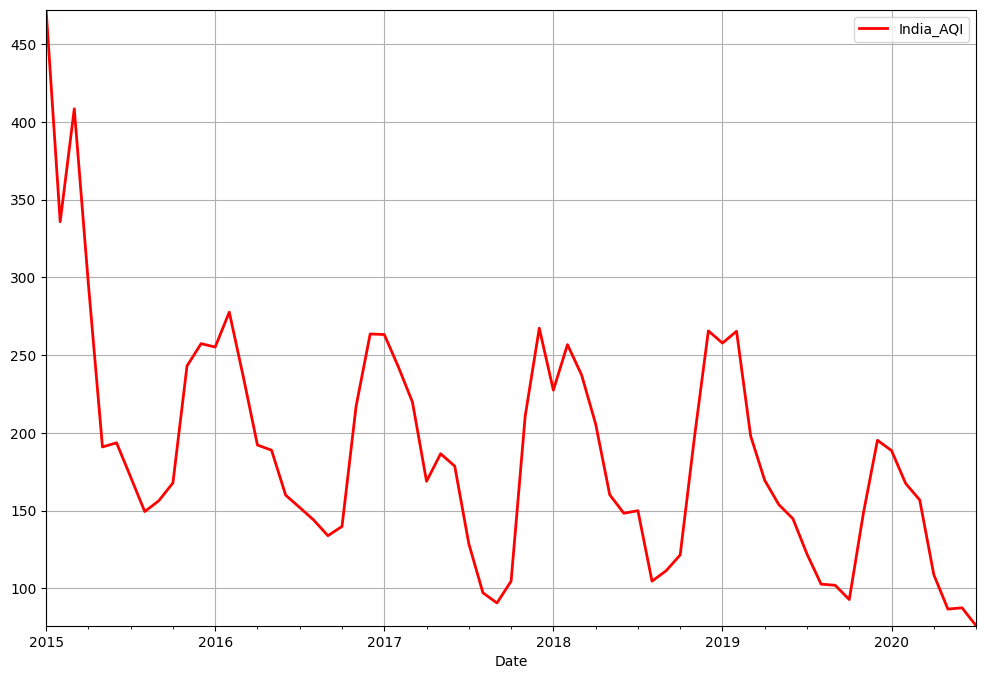

In [35]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

Straight away we can see patterns and trends over the years. There are two highly noticeable patterns. One is the general trend downwards. Over the past 5 years we can see the AQI reducing marginally. Note that this can be  a litte misleading, especially due to the 2015 data, as the dataset in the first few observations  only comprises of Delhi and Ahmedabad during which have relatively highly pollution compared to the rest of the cities which makes the initial portion of the graph highly exaggerated. Nevertheless we can see a general decline in pollution over the years. 

The next pattern thats easily observable is the seasonal component which plays a big role in the pollution of the country. We will discuss further  in the 2nd part of our project.
One other important point to note is the affect of COVID-19 on India's pollution level. The pollution levels are drastically lower during the year 2020 for the same reason.

We can move on to comparing the AQI of the cities to find the most polluted city and the least.
Note that we will be leaving the unavailable data as is and further modify if required.

## Air pollution by city for the year 2019
Our aim of the section is to find level of pollution in the cities and compare them, we use the year 2019 as it is by far the most complete in terms of data and it is the most recent full year and hence rather apt to compare.

We will start with forming a table with the data from 2019.

In [36]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,691.741935,NaN,173.592593,130.806452,120.354839,NaN,210.814815,NaN,142.774194,NaN,...,NaN,340.258065,346.354839,153.870968,412.466667,NaN,271.238095,127.806452,179.538462,257.717004
2019-02-01,736.785714,NaN,226.428571,91.592593,116.214286,NaN,264.785714,NaN,128.035714,NaN,...,NaN,367.250000,312.464286,166.035714,406.892857,NaN,291.629630,128.035714,271.500000,265.339636
2019-03-01,560.064516,NaN,114.838710,95.548387,108.290323,NaN,202.766667,NaN,118.451613,NaN,...,NaN,262.064516,243.903226,150.161290,292.032258,NaN,313.766667,89.419355,151.321429,198.041879
2019-04-01,610.133333,NaN,79.266667,99.413793,121.433333,NaN,189.366667,NaN,101.400000,NaN,...,NaN,158.333333,220.366667,122.300000,216.833333,NaN,192.352941,88.866667,93.033333,169.488694
2019-05-01,629.392857,NaN,78.290323,111.806452,123.870968,NaN,185.588235,NaN,87.290323,NaN,...,NaN,86.354839,221.064516,97.806452,151.032258,NaN,140.115385,70.193548,91.266667,153.878597


We can see that there seems to be still quite a few missing values. Let us take a look at the missing data.

In [37]:
df_2019.isna().sum()

Ahmedabad_AQI              0
Aizawl_AQI                13
Amaravati_AQI              1
Amritsar_AQI               0
Bengaluru_AQI              0
Bhopal_AQI                 9
Brajrajnagar_AQI           0
Chandigarh_AQI             9
Chennai_AQI                0
Coimbatore_AQI             6
Delhi_AQI                  0
Ernakulam_AQI             13
Gurugram_AQI               0
Guwahati_AQI               2
Hyderabad_AQI              0
Jaipur_AQI                 0
Jorapokhar_AQI             1
Kochi_AQI                 13
Kolkata_AQI                0
Lucknow_AQI                0
Mumbai_AQI                 0
Patna_AQI                  0
Shillong_AQI               9
Talcher_AQI                0
Thiruvananthapuram_AQI     0
Visakhapatnam_AQI          0
India_AQI                  0
dtype: int64

We can see that there are 3 cities whose data is missing in its entirety. We will remove these columns as they serve no purpose. There are few other columns with a few missing months of data. For our analysis we will keep them even though it might add to the inacuracy of our results.

In [38]:
df_2019=df_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI'],axis=1)

We will take the average of all the months for each city to find the AQI for the year 2019.

In [39]:
AQI_2019=df_2019.mean(axis=0)

Before looking at the means of the AQI values of the cities, we will take a look at the boxplots of the AQI values of the various cities.

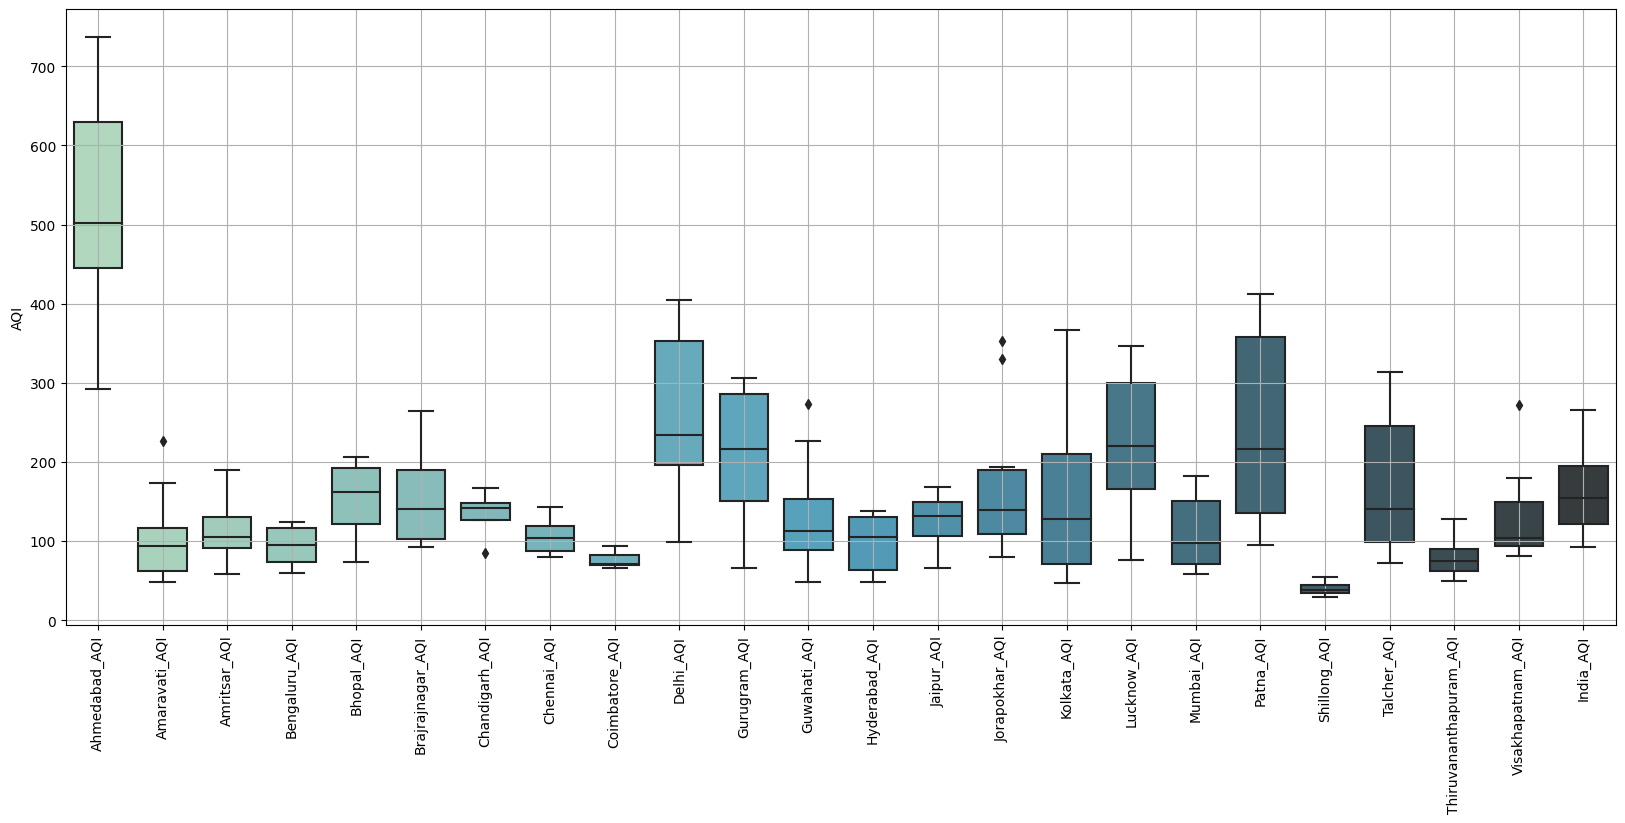

In [40]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('AQI')
bplot.grid(True)


We can see that Ahmedebad has easily the highest values of AQI in the country, followed by Delhi lagging far behind. Let us take a look at the means of the values of AQI for further comparison.

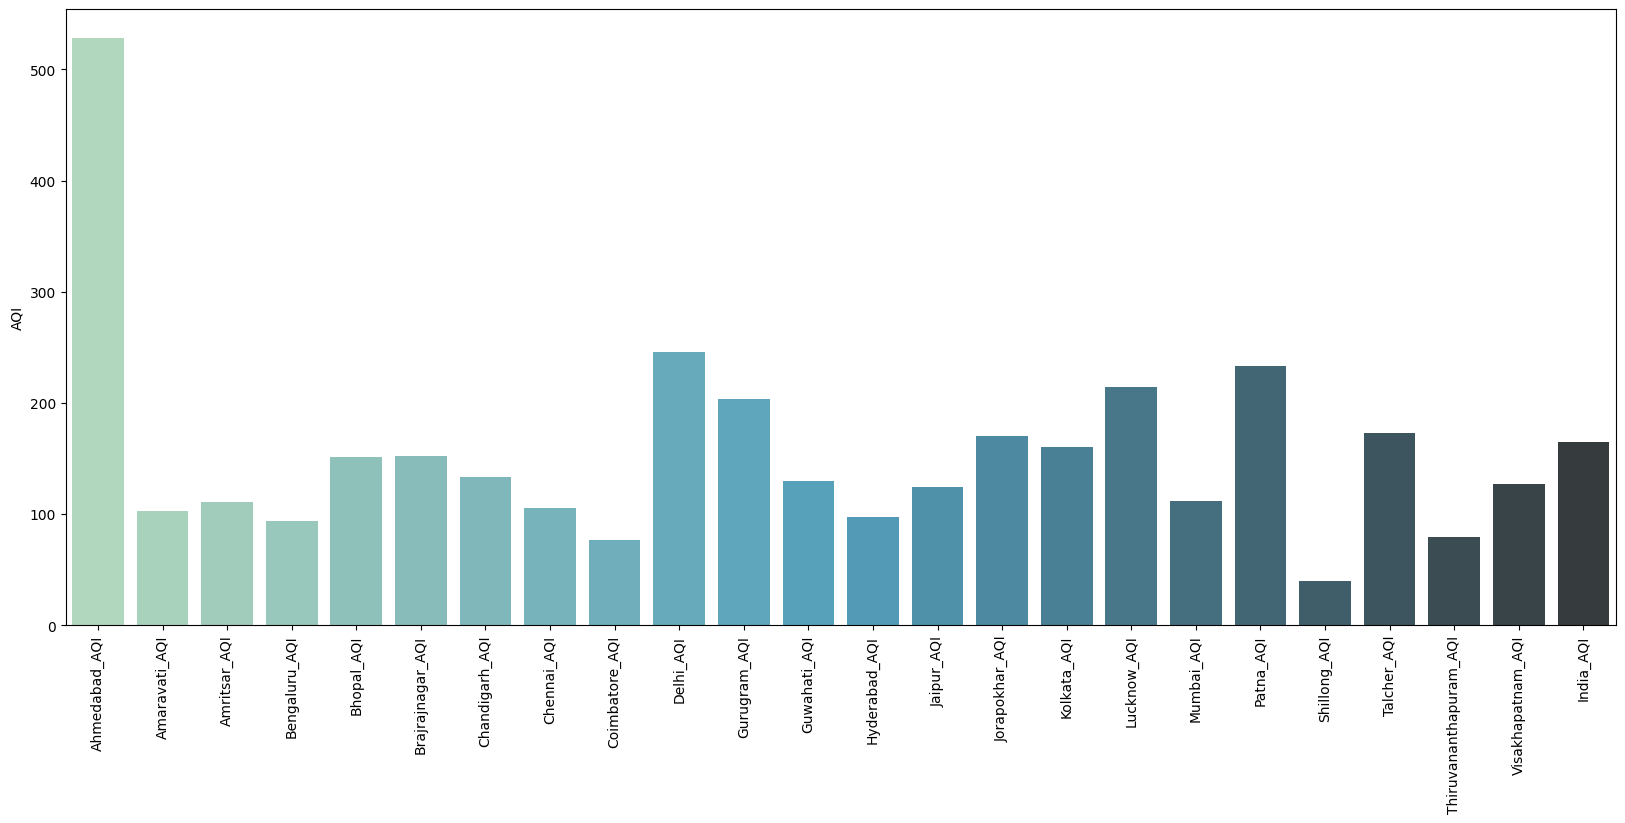

In [41]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.ylabel('AQI')
bplot=sns.barplot(x = AQI_2019.index, y = AQI_2019.values,palette="GnBu_d", )


We can see that Ahmedabad and Delhi are the most polluted whereas Shillong is the least followed by trivandrum. With this we end the comparison and move to the next section of forecasting the values of future AQI for the whole of India.

## Analysing and forecasting of AQI values:
We will first take a look at the seasonal decompose of the AQI values of india.

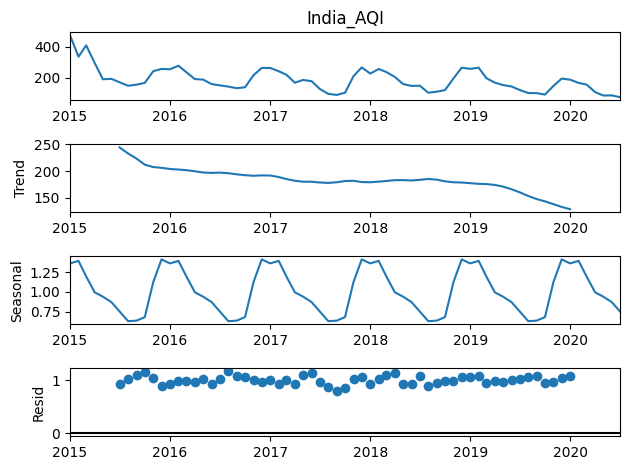

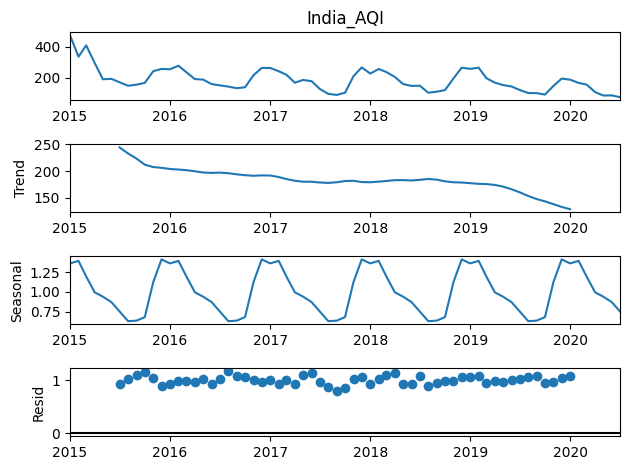

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot()

As we have discussed earlier ,there is a very clear seasonality, and  a less clearer trend. The trend is possibly  due to increasing restrictions on pollution by the govt and the last surge downward is clearly due to the recent Covid-19. 

How about the seasonality, what causes the increase during certian months and a decline in others? Let us take a closer look during which months the pollution peaks.

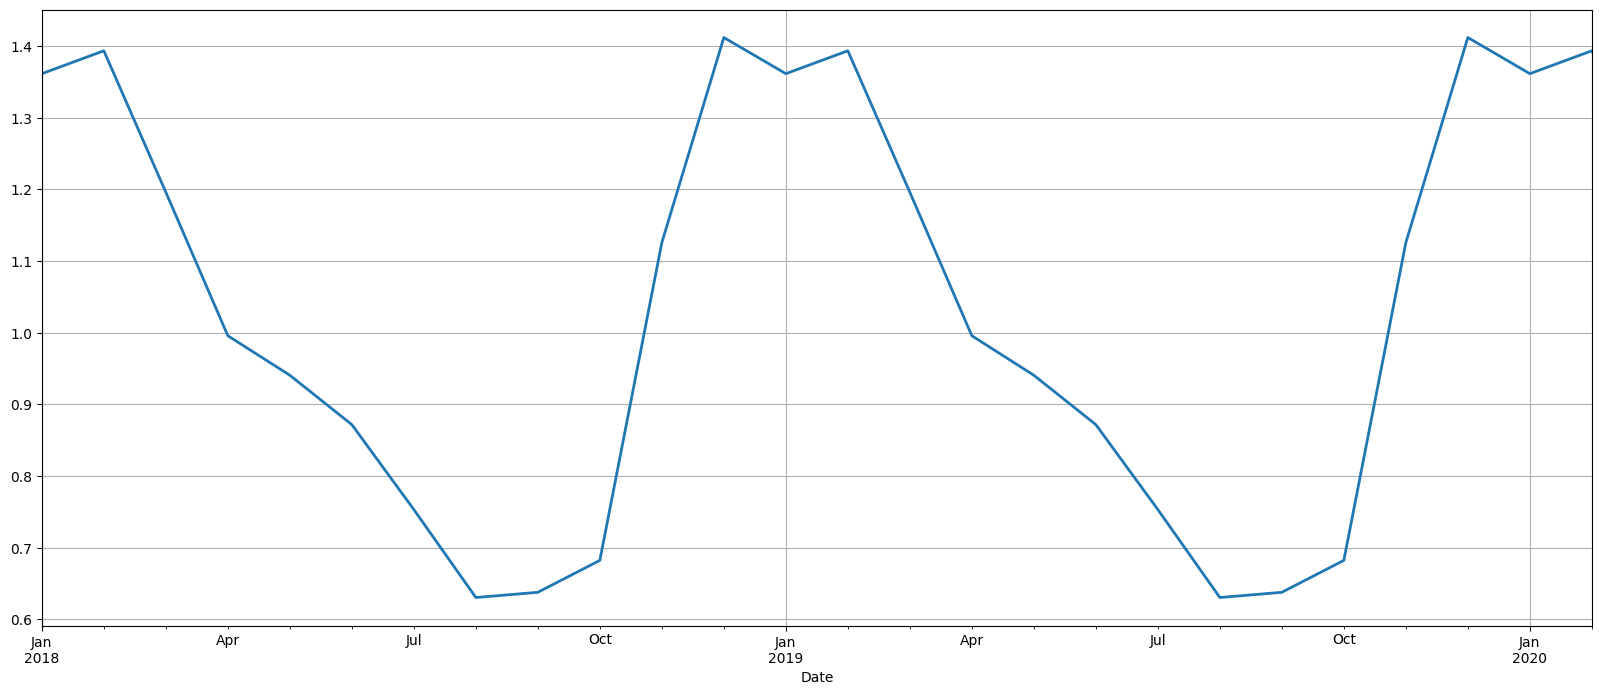

In [45]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

We can see that there are two peaks largely, one during October and the during January. And the lowest amount of pollution is around july-September after which there is a sharp increase. 
Similarly, there is a decrease from January to July. This spike in the winters is due to a combination of factors. One point of note is that North Indian states have a higher increase of pollution.

The spike is due to factors including Winter aversion(explained after),valley affect(explained after), seasonal factors such as dust storms,  crop fires, burning of solid fuels for heating, and firecracker-related pollution during Diwali, stubble burning etc.


### Winter Aversion:
In summer, air in the planetary boundary layer (the lowest part of the atmosphere) is warmer and lighter, and rises upwards more easily. This carries pollutants away from the ground and mixes them with cleaner air in the upper layers of the atmosphere in a process called ‘vertical mixing’.  

During winters the planetary boundary layer is thinner as the cooler air near the earth’s surface is dense. The cooler air is trapped under the warm air above that forms a kind of atmospheric ‘lid’. This phenomenon is called winter inversion. Since the vertical mixing of air happens only within this layer, the pollutants released lack enough space to disperse in the atmosphere.
During summers, pollution levels decrease as the warmer air rises up freely, making the boundary layer thicker, and providing enough space for pollutants to disperse. The same thing happens during winter afternoons, when increased heat brings down pollution slightly.

The effects of inversion are stronger at night, which is why air quality levels drop overnight. This is also why experts ask people to refrain from early morning walks, as they could be exposed to much higher pollution levels at that time.
In cities closer to the coast, like Mumbai, the sea breeze and moisture help disperse pollution. However, the Indo-Gangetic plain, which includes Punjab, Delhi, UP, Bihar and West Bengal, is like a valley surrounded by the Himalayas and other mountain ranges. Polluted air settles in this land-locked valley and is unable to escape due to low wind speeds.
In major cities of this region, such as Delhi and Kanpur, high industrial and vehicular emissions coupled with biomass burning in surrounding areas cause more pollution that gets trapped due to this valley effect and inversion.

 Now that we have an explantion for the seasonal component as well as trend component let us try to predict future values of AQI based purely on previous values.



# Forecasting: 
We will be using three methods for forecasting values of AQI for India, namely,  SARIMA, RNN using LSTM and facebook prophet.
It is obviously overkill to be using these three methods however being new to time series I would personally like to explore all three options. Normally for such a small dataset RNN would not be recommended.

## Facebook Prophet:
This is a library formed by Facebook which is extremely easy to implement with aesthetically pleasing visuals. It is also quite a well made model. However, one drawback is that the model is fairly uncustomizable in terms of the actual modelling as well as visualization and hence a less transparent version than SARIMA, however, quite a bit less of a black box than RNN's. Also note that Prophets main strength is daily data, which isnt being used here.

In [46]:
from prophet import Prophet

In [47]:
#Formatting necessary to Prophet:
India_AQI=India_AQI.reset_index()
India_AQI.columns=['ds','y']

In [48]:
# Forming test/train data:
train=India_AQI[:-24]
test=India_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:46 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

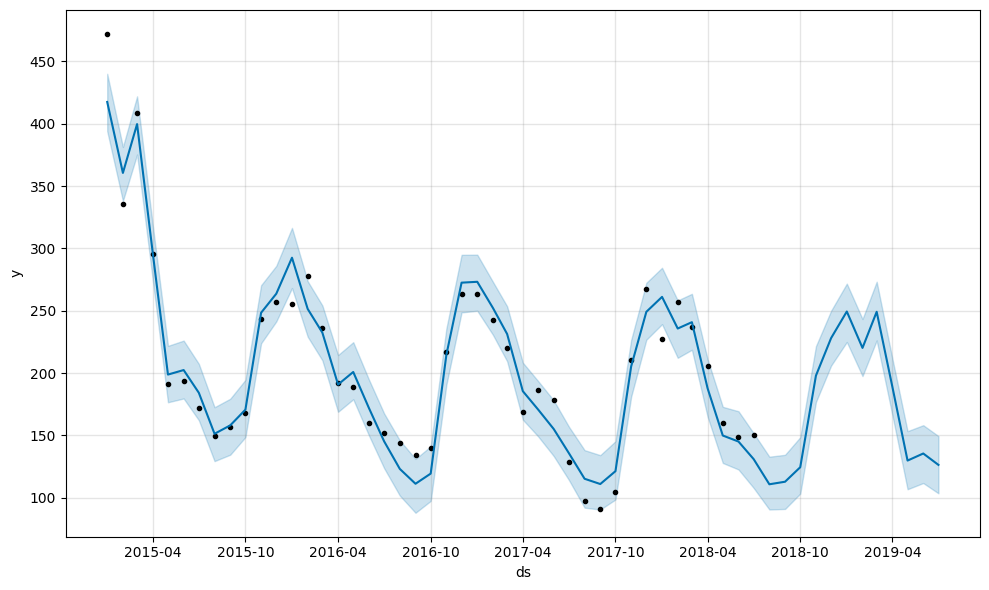

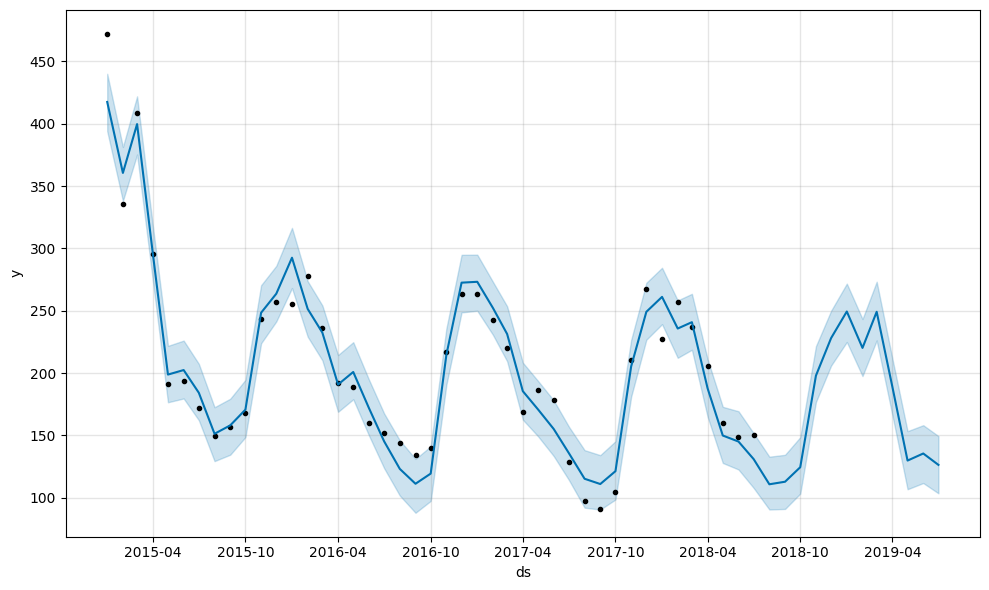

In [50]:
forecast = m.predict(future)
m.plot(forecast)

In [51]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forecast['yhat'][-12:],test['y']))
print('RMSE = ',RMSE)
print('Mean AQI',test['y'].mean())

RMSE =  24.569277939615894
Mean AQI 175.90758988415428


In [58]:
# Reset everything
India_AQI2=final_df['India_AQI'][:'2019']
# India_AQI2.tail()
India_AQI2=India_AQI.reset_index()
India_AQI2.columns=['ds','y']


21:54:27 - cmdstanpy - INFO - Chain [1] start processing
21:54:28 - cmdstanpy - INFO - Chain [1] done processing


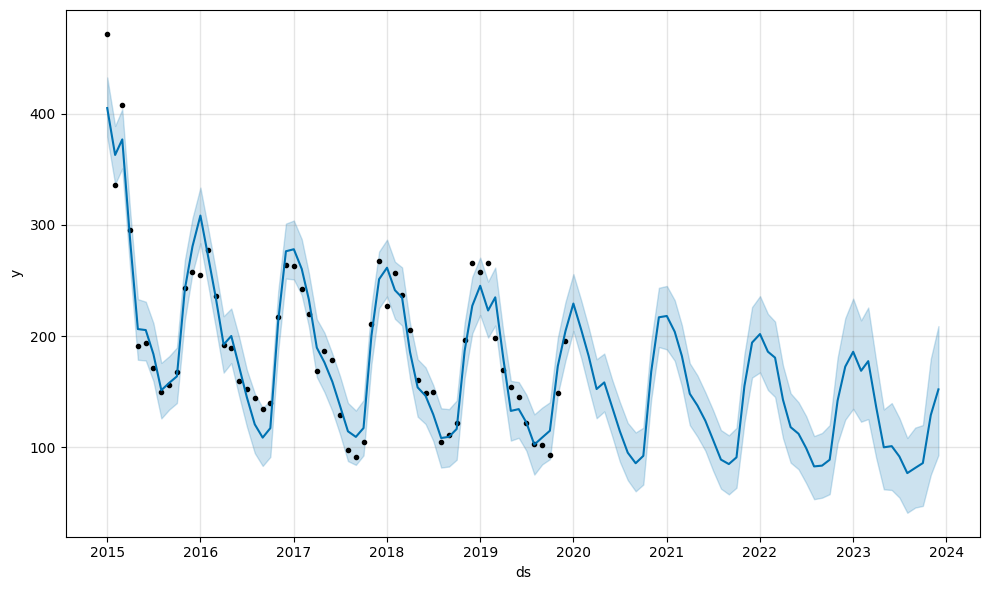

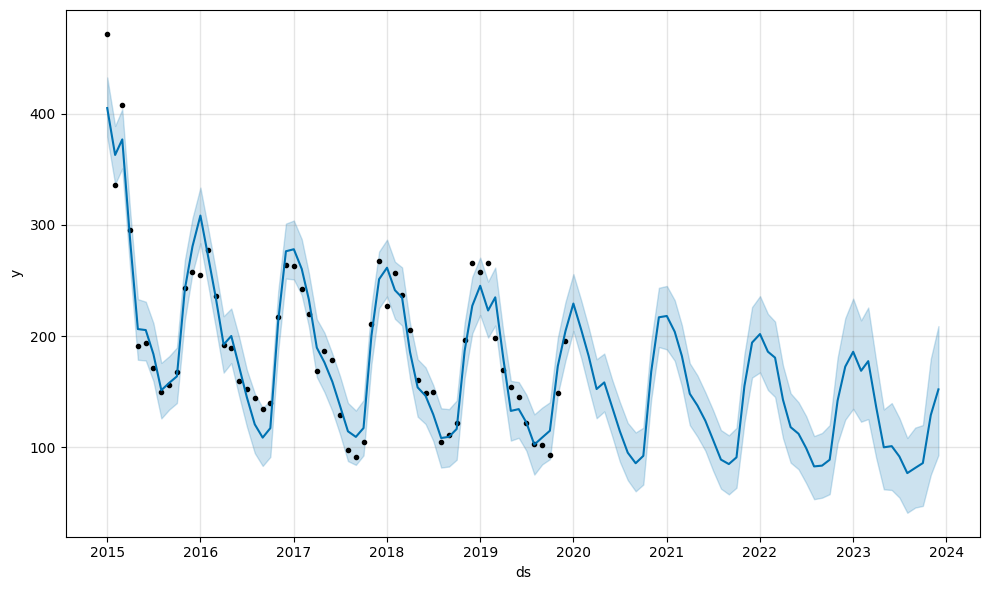

In [67]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=False,daily_seasonality=False)
m.fit(India_AQI2)
future = m.make_future_dataframe(periods=24*2,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast)

This is the final plot into the future. Surprisingly, this model looks like it could be a  predictor better than SARIMA for this case considering the trend has not been too greatly altered for due to covid. This further seems to indicate that prophet seems to be placing more emphasis on past values as compared to SARIMA. Note that we can retrieve the predicted values from the forecast object. 

Finally let us take a look at the components of our data found by prophet:

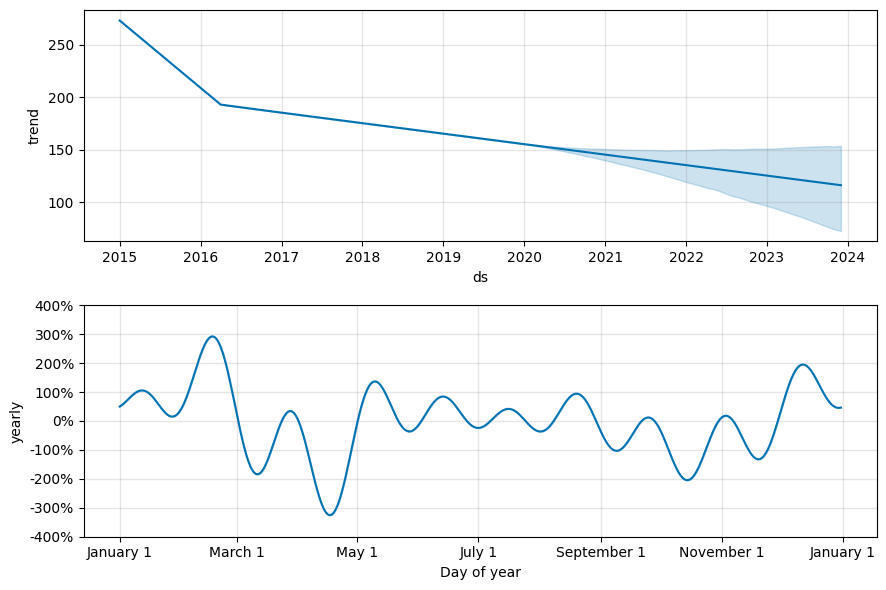

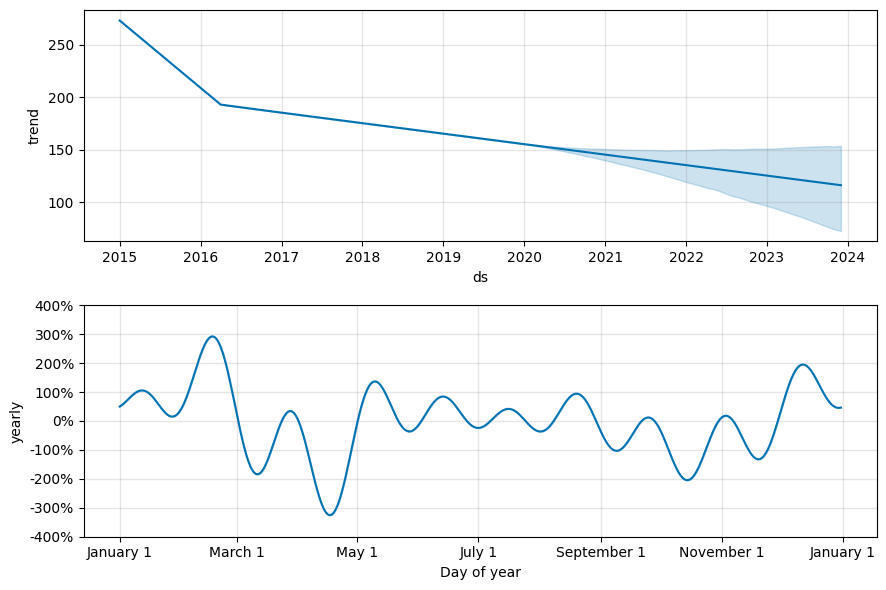

In [68]:
m.plot_components(forecast)

The above diagram does give us a much clearer indepth idea of the trend and seasonal component of our data. 
With this we have come to an end to the prediction of AQI values using prophet.

Again, like that with SARIMA, we can see that the prediction is highly optimistic due to COVID-19 which can possibly be better by removing the year 2020 and predicting two years in using data pre 2020. 

With this we have come to the end of the forecasting section and the notebook overall.

In [44]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-08-01',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

In [45]:
final_df=final_df.astype('float64')

# final_df['Delhi'] = final_df['Delhi_AQI'].interpolate(method='polynomial', order=5)
mean_value= final_df['Delhi_AQI'].median()
final_df['Delhi_AQI'] = final_df['Delhi_AQI'].fillna(mean_value)
final_df=final_df.resample(rule='MS').mean()

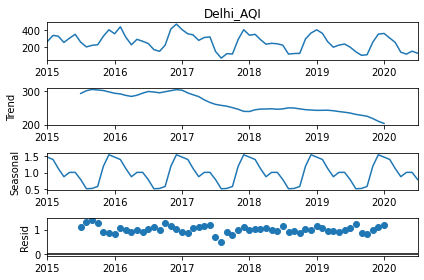

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI=final_df['Delhi_AQI']
result=seasonal_decompose(Delhi_AQI,model='multiplicative')
result.plot();

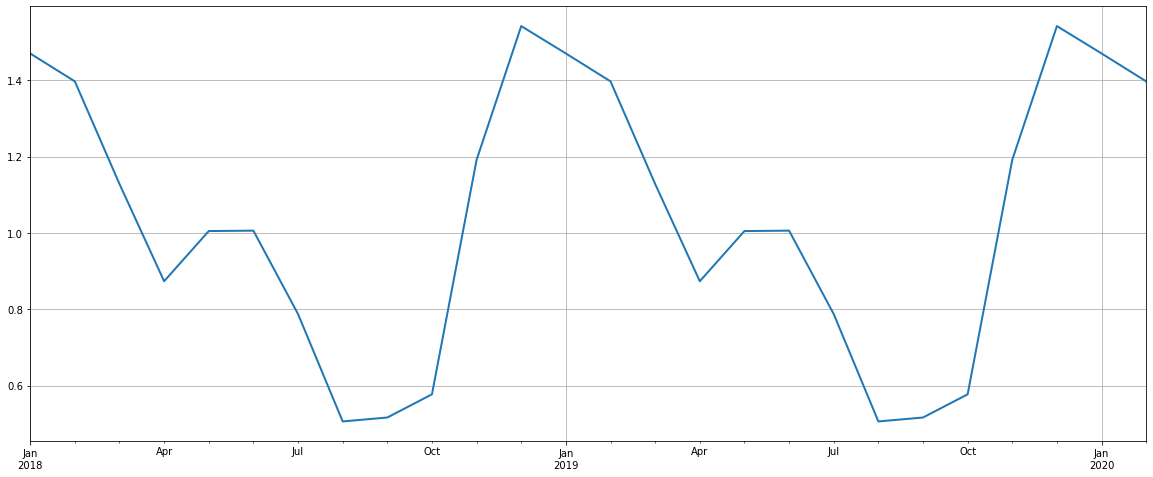

In [47]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [48]:
#Formatting necessary to Prophet:
Delhi_AQI=Delhi_AQI.reset_index()
Delhi_AQI.columns=['ds','y']

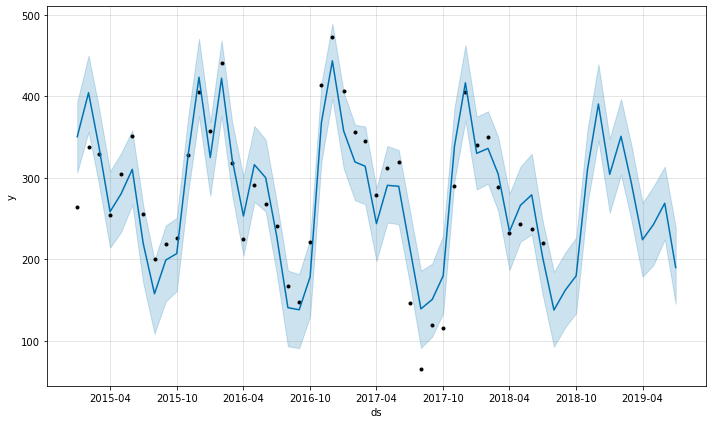

In [53]:
# Forming test/train data:
train= Delhi_AQI[:-24]
test= Delhi_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)
future = m.make_future_dataframe(periods=12,freq = 'MS')

forecast = m.predict(future)
m.plot(forecast);

In [54]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,309.528711,306.616334,393.190703,309.528711,309.528711,0.131879,0.131879,0.131879,0.131879,0.131879,0.131879,0.0,0.0,0.0,350.349049
1,2015-02-01,308.679070,356.389477,449.705542,308.679070,308.679070,0.309825,0.309825,0.309825,0.309825,0.309825,0.309825,0.0,0.0,0.0,404.315419
2,2015-03-01,307.911652,293.794709,387.230411,307.911652,307.911652,0.102037,0.102037,0.102037,0.102037,0.102037,0.102037,0.0,0.0,0.0,339.330175
3,2015-04-01,307.062010,214.236957,307.902852,307.062010,307.062010,-0.158811,-0.158811,-0.158811,-0.158811,-0.158811,-0.158811,0.0,0.0,0.0,258.297095
4,2015-05-01,306.239776,233.113819,329.924126,306.239776,306.239776,-0.085602,-0.085602,-0.085602,-0.085602,-0.085602,-0.085602,0.0,0.0,0.0,280.025024
5,2015-06-01,305.390135,267.091033,358.016119,305.390135,305.390135,0.016053,0.016053,0.016053,0.016053,0.016053,0.016053,0.0,0.0,0.0,310.292559
6,2015-07-01,304.567901,170.913856,265.941421,304.567901,304.567901,-0.279753,-0.279753,-0.279753,-0.279753,-0.279753,-0.279753,0.0,0.0,0.0,219.364131
7,2015-08-01,303.718260,108.729144,198.912134,303.718260,303.718260,-0.480875,-0.480875,-0.480875,-0.480875,-0.480875,-0.480875,0.0,0.0,0.0,157.667760
8,2015-09-01,302.868618,148.474300,241.507760,302.868618,302.868618,-0.342903,-0.342903,-0.342903,-0.342903,-0.342903,-0.342903,0.0,0.0,0.0,199.014066
9,2015-10-01,302.046384,160.858787,250.613451,302.046384,302.046384,-0.314844,-0.314844,-0.314844,-0.314844,-0.314844,-0.314844,0.0,0.0,0.0,206.948771


In [50]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forecast['yhat'][-12:],test['y']))
print('RMSE = ',RMSE)
print('Mean AQI',test['y'].mean())

RMSE =  40.741521001219226
Mean AQI 241.6386584741423


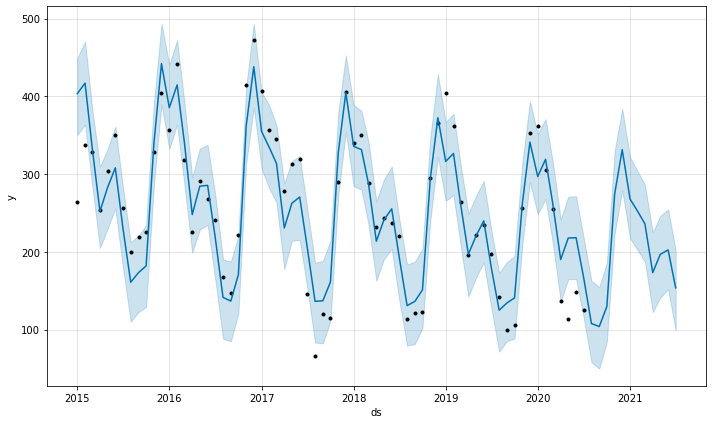

In [51]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=False,daily_seasonality=False)
m.fit(Delhi_AQI)
future = m.make_future_dataframe(periods=12,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast);

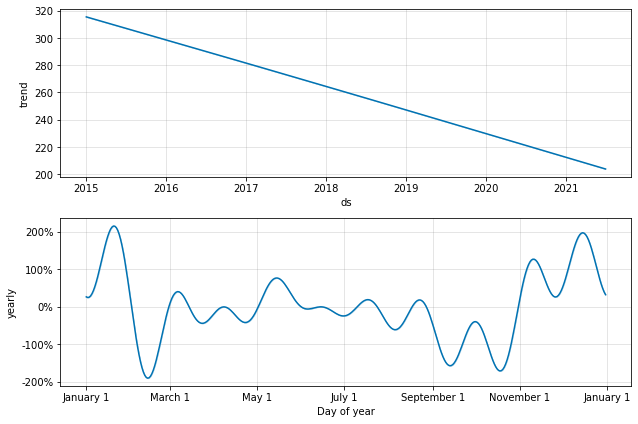

In [52]:
m.plot_components(forecast);